In [15]:

import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

import warnings
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv("Market_Basket_Optimisation.csv")
df

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7496,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df.fillna('',inplace=True)

In [18]:
trans = []
for i in range(0,len(df)):
    tran = []
    for j in range(0,len(df.columns)):
        if(df.iloc[i,j]!=''):
            tran.append(df.iloc[i,j])
    trans.append(tran)        

In [19]:
trans

[['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spaghetti',
  'mineral water',
  'black tea',
  'salmon',
  'eggs',
  'chicken',
  'extra dark chocolate'],
 ['meatballs', 'milk', 'honey', 'french fries', 'protein bar'],
 ['red wine', 'shrimp', 'pasta', 'pepper', 'eggs', 'chocolate', 'shampoo'],
 ['rice', 'sparkling water'],
 ['spaghetti', 'mineral water', 'ham', 'body spray',

In [20]:
te = TransactionEncoder()
te_ary = te.fit_transform(trans) 

In [21]:
df = pd.DataFrame(te_ary,columns=te.columns_)
df

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
def rules(support,threshold):
    frequent_items = apriori(df,min_support=support,use_colnames=True)
    rules = association_rules(frequent_items,metric='confidence',min_threshold=threshold)
    return rules

results = []

support_values = [0.01, 0.02, 0.03, 0.04]
confidence_values = [0.2, 0.3, 0.4, 0.5]

for i in support_values:
    for j in confidence_values:
        trules = rules(i,j)
        results.append({
            'support':i,
            'confidence':j,
            'total rules':len(trules)
        })
        
results_df = pd.DataFrame(results)
results_df

,support,confidence,total rules
0,0.01,0.2,162
1,0.01,0.3,63
2,0.01,0.4,17
3,0.01,0.5,2
4,0.02,0.2,56
5,0.02,0.3,20
6,0.02,0.4,3
7,0.02,0.5,0
8,0.03,0.2,27
9,0.03,0.3,7


In [23]:
frequent_items = apriori(df,min_support=0.02,use_colnames=True)
frequent_items

,support,itemsets
0,0.020267,(almonds)
1,0.033200,(avocado)
2,0.033733,(brownies)
3,0.087200,(burgers)
4,0.030133,(butter)
...,...,...
99,0.020133,"(mineral water, whole wheat rice)"
100,0.022933,"(olive oil, spaghetti)"
101,0.025200,"(pancakes, spaghetti)"
102,0.021200,"(shrimp, spaghetti)"


In [24]:
rules = association_rules(frequent_items,metric='confidence',min_threshold=0.3)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(burgers),(eggs),0.087200,0.179733,0.028800,0.330275,1.837585,0.013127,1.224782,0.499351
1,(cake),(mineral water),0.081067,0.238267,0.027467,0.338816,1.422002,0.008151,1.152074,0.322947
2,(chicken),(mineral water),0.060000,0.238267,0.022800,0.380000,1.594852,0.008504,1.228602,0.396790
3,(chocolate),(mineral water),0.163867,0.238267,0.052667,0.321400,1.348907,0.013623,1.122506,0.309351
4,(cooking oil),(mineral water),0.051067,0.238267,0.020133,0.394256,1.654683,0.007966,1.257517,0.416947
5,(frozen smoothie),(mineral water),0.063200,0.238267,0.020133,0.318565,1.337012,0.005075,1.117838,0.269069
6,(frozen vegetables),(mineral water),0.095333,0.238267,0.035733,0.374825,1.573133,0.013019,1.218433,0.402718
7,(ground beef),(mineral water),0.098267,0.238267,0.040933,0.416554,1.748266,0.017520,1.305576,0.474647
8,(ground beef),(spaghetti),0.098267,0.174133,0.039200,0.398915,2.290857,0.022088,1.373959,0.624888
9,(low fat yogurt),(mineral water),0.076400,0.238267,0.023867,0.312391,1.311098,0.005663,1.107800,0.256908


In [25]:
max_length = frequent_items['itemsets'].apply(len).max()
# max_length is 2 here
last_table = frequent_items[frequent_items['itemsets'].apply(len) == max_length]
# jiska bhi itemset 2 ke equal sirf wahi print hoga baki koi nhi 
last_table = last_table.reset_index(drop=True)
last_table = last_table.round(3)
last_table

,support,itemsets
0,0.029,"(burgers, eggs)"
1,0.022,"(french fries, burgers)"
2,0.024,"(mineral water, burgers)"
3,0.021,"(burgers, spaghetti)"
4,0.027,"(mineral water, cake)"
5,0.023,"(mineral water, chicken)"
6,0.033,"(chocolate, eggs)"
7,0.034,"(chocolate, french fries)"
8,0.023,"(chocolate, frozen vegetables)"
9,0.023,"(chocolate, green tea)"


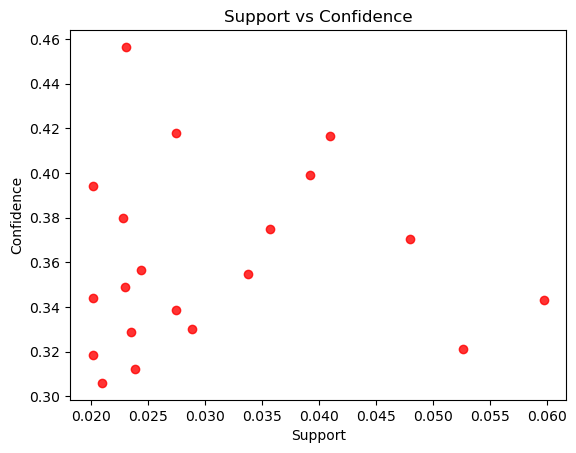

In [26]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.8, c='r')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()

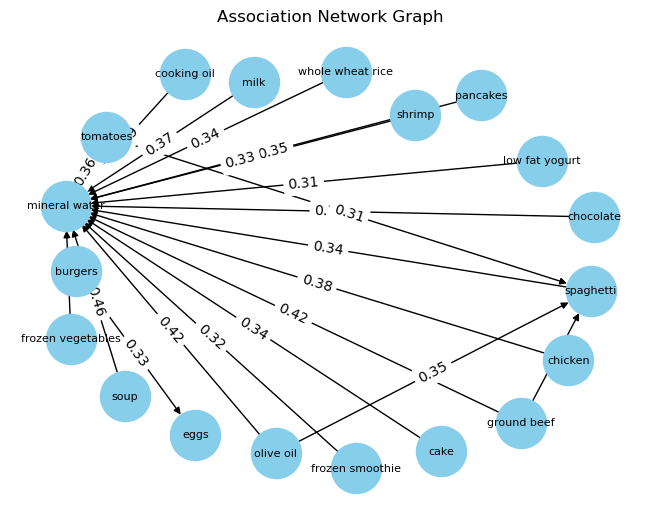

In [34]:
G = nx.DiGraph()

for _,rule in rules.iterrows():
    antecedents = ','.join(list(rule['antecedents']))
    consequents = ','.join(list(rule['consequents']))
    G.add_edge(antecedents,consequents,confidence = round(rule['confidence'], 2))
    
pos = nx.spring_layout(G,k=500)
nx.draw(G, pos, with_labels=True, node_size=1300, node_color='skyblue', font_size=8, arrows=True)

edge_labels = nx.get_edge_attributes(G, 'confidence')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Association Network Graph")
plt.show()
